# Regression

## Question 1: What is Simple Linear Regression?
Simple Linear Regression (SLR) is a statistical method used to model the relationship between two variables by fitting a linear equation to observed data. It involves:

* One independent (predictor) variable (X)
* One dependent (response) variable (Y)

The goal is to find the best-fit straight line that predicts Y based on X.

-------------------------------------------------------------------------------------
Key Components
* 1. Equation of the Line:
   - Y =β0 + β1X + ϵ

     * Y: Dependent variable (output).
     * X: Independent variable (input).
     * β0: Intercept (value of Y when X = 0)
     * β1: Slope (change in Y per unit change in X).
     * ϵ: Random error (residual).
       
* 2. Assumptions
     * Linear relationship between X and Y.
     * Errors are normally distributed with mean 0.
     * Homoscedasticity (constant variance of errors).
     * No multicollinearity (only one predictor).

* 3. Fitting the Model:
     The least squares method minimizes the sum of squared residuals to estimate β0 and β1.
-----------------------------------------------------------------------------------------------
Example:
Predicting a person's weight (Y) based on their height (X).
* if β1 = 0.5, for every 1 cm increase in height, weight increases by 0.5 kg.

## Question 2: What are the key assumptions of Simple Linear Regression
* key assumptions of Simple Linear Regression
     * Linear relationship between X and Y.
     * Errors are normally distributed with mean 0.
     * Homoscedasticity (constant variance of errors).
     * No multicollinearity (only one predictor).

## Question 3: What is heteroscedasticity, and why is it important to address in regression models?
* Heteroscedasticity (also spelled heteroskedasticity) occurs in regression models when the variance of the residuals (errors) is not constant across all levels of the independent variable(s).

    1. Visually: The spread of data points around the regression line "fans out" or varies systematically (e.g., larger errors as X increases).
    2. Opposite: Homoscedasticity (constant variance of residuals is ideal for regression).

## Question 4: What is Multiple Linear Regression?
Multiple Linear Regression (MLR) extends Simple Linear Regression by modeling the relationship between one dependent variable (Y) 
and two or more independent variables (X₁, X₂, ..., Xₚ). 
The goal is to predict the outcome (Y) based on multiple predictors while accounting for their individual and combined effects.

Key Equation

--------------
The MLR model is represented as:

    Y = β0 + β1X1 + β2X2 + ⋯ + βpXp +ϵ

    Y: Dependent (response) variable.
    
    X1 ,X2, … , Xp : Independent (predictor) variables.
    
    β0: Intercept (baseline value when all X = 0).
    
    β1, β2, ⋯ , βp: Coefficients (change in Y per unit change in each X).
    
    ϵ: Random error (residual).

## Question 5: What is polynomial regression, and how does it differ from linear regression?
Polynomial Regression is a form of regression analysis that models the relationship between the independent variable (X) 
and the dependent variable (Y) as an n-th degree polynomial. 
Unlike linear regression, which assumes a straight-line relationship, polynomial regression can capture nonlinear patterns (curves) 
in the data.

| Aspect                        | Linear Regression                                              | Polynomial Regression                                      |
| ----------------------------- | -------------------------------------------------------------- | ---------------------------------------------------------- |
| **Model form**                | $y = \beta_0 + \beta_1x$                                       | $y = \beta_0 + \beta_1x + \beta_2x^2 + \dots + \beta_nx^n$ |
| **Relationship**              | Models a straight-line (linear) relationship between variables | Models a curved (nonlinear) relationship                   |
| **Flexibility**               | Limited to linear patterns                                     | Can capture more complex trends in the data                |
| **Linearity in coefficients** | Linear                                                         | Still linear in coefficients (despite nonlinear in $x$)    |
| **Overfitting risk**          | Lower                                                          | Higher with higher-degree polynomials                      |


## Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.


Intercept (β₀): 0.18
Slope (β₁): 1.98


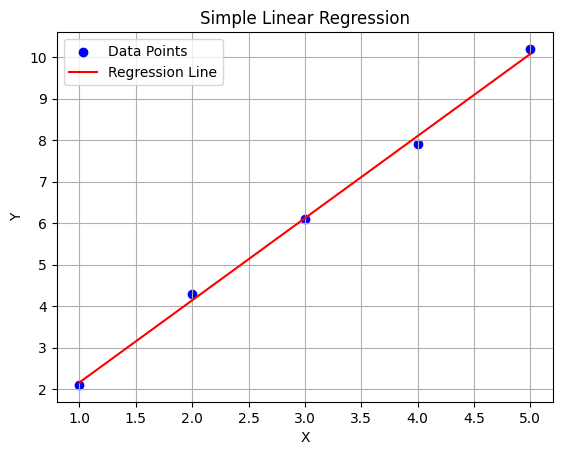

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = [1, 2, 3, 4, 5]
Y = [2.1, 4.3, 6.1, 7.9, 10.2]

# Convert to NumPy arrays and reshape X
X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Print the coefficients
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")

# Plotting the data and the regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


## Question 7: Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.


In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Area', 'Rooms']]
y = df['Price']


In [15]:
# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β₁, β₂):", model.coef_)


Intercept (β₀): 103157.89473684214
Coefficients (β₁, β₂): [   63.15789474 34736.84210526]


In [16]:
# Add constant for statsmodels
X_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)



Variance Inflation Factors:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


## Question 8: Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]
 
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve

Intercept (β₀): 0.06000000000000938
Coefficients (β₁, β₂): [1.94 0.2 ]


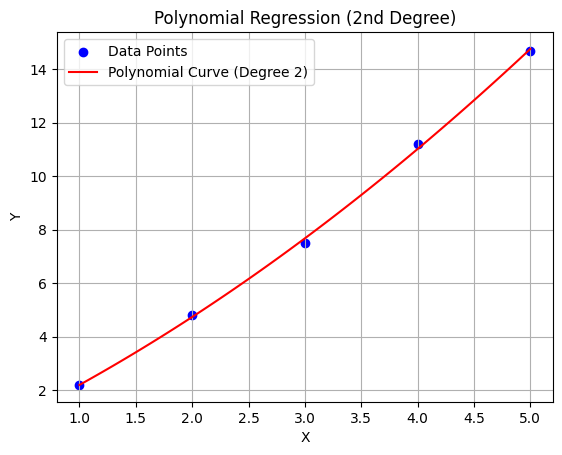

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict using the model
X_fit = np.linspace(1, 5, 100).reshape(-1, 1)  # More points for a smooth curve
X_fit_poly = poly.transform(X_fit)
Y_pred = model.predict(X_fit_poly)

# Print coefficients
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β₁, β₂):", model.coef_[1:])

# Plot original data and fitted curve
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_fit, Y_pred, color='red', label='Polynomial Curve (Degree 2)')
plt.title("Polynomial Regression (2nd Degree)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


## Question 9: Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.


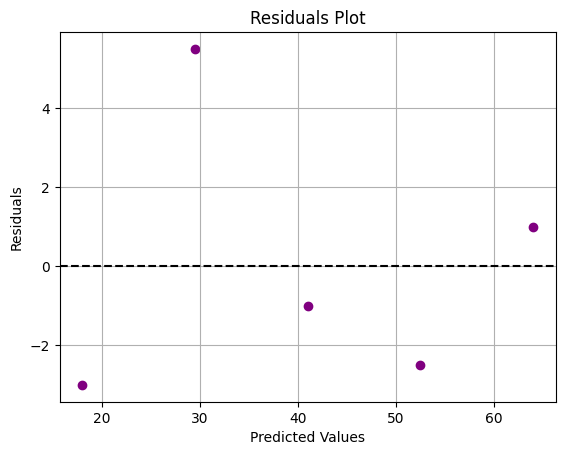

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predict values and compute residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# Plot residuals
plt.scatter(Y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

## Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

## Solution:
To build a robust regression model for predicting house prices when facing heteroscedasticity and multicollinearity, you should systematically address both issues as follows:


-----------------------------------
1. Handling Heteroscedasticity
   
Heteroscedasticity means the variance of the error terms changes across levels of an independent variable, violating regression assumptions and leading to inefficient estimates and unreliable inference.

Steps to Address Heteroscedasticity:
* Residual Plot Inspection: Plot residuals versus fitted values. A funnel shape suggests heteroscedasticity.
* Use Robust Standard Errors: Calculate robust (e.g., White’s or Huber-White) standard errors so that statistical inference remains valid despite heteroscedasticity.
* Transform Variables: Apply a transformation (e.g., log, square root) to the dependent variable (e.g., predict log(price) instead of price), which often stabilizes variance.
* Weighted Least Squares (WLS): Instead of ordinary least squares (OLS), use WLS where cases are weighted inversely to their error variance.


-----------------------------------
2. Handling Multicollinearity
   
Multicollinearity occurs when two or more predictor variables are highly correlated, which can inflate the variance of coefficient estimates and make interpretation unreliable.

Steps to Address Multicollinearity:
* Detect with VIF: Calculate the Variance Inflation Factor (VIF) for each predictor. A VIF >10 (or conservatively >5) indicates problematic multicollinearity.
* Remove/Combine Predictors: If two variables are highly correlated, consider removing one or combining them into a new feature (e.g., total area from area and number of rooms).
* Regularization Techniques: Use ridge regression or lasso regression, which add a penalty to the size of coefficients and address multicollinearity by shrinking them.
* Principal Component Analysis (PCA): Apply PCA to extract uncorrelated components from your predictors and use these for regression.


-----------------------------------
3. General Modeling Best Practices
   
* Feature Engineering: Ensure variables are encoded meaningfully (e.g., one-hot encoding of categorical location).
* Model Validation: Use cross-validation for robust performance estimates.
* Assess Predictive Performance: Evaluate model performance using out-of-sample data and relevant metrics (e.g., RMSE, MAE).

Summary Table:

| **Issue**              | **Detection**                                          | **Solution(s)**                                                                                                             |
| ---------------------- | ------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| **Heteroscedasticity** | Residual plot, statistical tests (e.g., Breusch–Pagan) | - Use robust standard errors<br>- Transform variables (e.g., log)<br>- Apply Weighted Least Squares (WLS)                   |
| **Multicollinearity**  | Variance Inflation Factor (VIF), correlation matrix    | - Remove or combine correlated features<br>- Apply regularization (Ridge/Lasso)<br>- Use Principal Component Analysis (PCA) |
